<a href="https://colab.research.google.com/github/GowthamSagar17/Cyber-Threat-Detection-and-Prediction/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter("ignore")

In [18]:
df=pd.read_csv(r"/content/CTDAPD Dataset.csv")
df

,Date,Source_IP,Destination_IP,Source_Port,Destination_Port,Protocol_Type,Flow_Duration,Packet_Size,Flow_Bytes_per_s,Flow_Packets_per_s,...,Attack_Vector,Attack_Severity,Botnet_Family,Malware_Type,CPU_Utilization,Memory_Utilization,System_Patch_Status,Label,Normalized_Packet_Flow,Anomaly_Severity_Index
0,2018-01-01 00:00:00,192.168.1.1,8.8.8.8,57708.0,443.0,TCP,15.0,500.0,6.375467,5.414037,...,NaN,Low,NaN,NaN,16.375491,60.918547,Outdated,Normal,2.000000,73.168788
1,2018-01-01 01:00:00,172.16.0.1,4.4.4.4,29980.0,8080.0,TCP,390.0,472.0,6.694334,2.497333,...,NaN,Low,NaN,NaN,31.986167,7.718833,Outdated,Attack,0.102564,16.059524
2,2018-01-01 02:00:00,10.0.0.1,8.8.8.8,31923.0,443.0,TCP,120.0,129.0,7.948582,3.607725,...,NaN,Medium,NaN,NaN,1.919325,51.726672,Up-to-date,Normal,0.233333,99.333361
3,2018-01-01 03:00:00,192.168.1.1,8.8.8.8,10525.0,80.0,TCP,3.0,500.0,7.326526,4.144272,...,NaN,Low,NaN,NaN,21.078560,20.463289,Up-to-date,Normal,9.666667,46.645165
4,2018-01-01 04:00:00,192.168.1.1,1.1.1.1,31755.0,80.0,UDP,7.0,458.0,7.080846,2.667007,...,NaN,Medium,NaN,NaN,24.940597,43.652572,Up-to-date,Normal,3.571429,31.648643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15198,2019-09-26 06:00:00,192.168.1.1,4.4.4.4,18987.0,443.0,TCP,38.0,475.0,5.916658,3.916583,...,NaN,Low,NaN,NaN,6.475876,48.335780,Up-to-date,Normal,0.868421,61.183069
15199,2019-09-26 07:00:00,192.168.1.1,4.4.4.4,31337.0,80.0,TCP,82.0,439.0,5.256962,2.329426,...,NaN,Low,NaN,NaN,36.199798,21.384255,Up-to-date,Normal,0.439024,42.947292
15200,2019-09-26 08:00:00,192.168.1.1,1.1.1.1,33952.0,443.0,ICMP,47.0,585.0,14.880324,4.077584,...,SQL Injection,Low,NaN,NaN,14.826525,30.983199,Up-to-date,Normal,0.659574,40.661351
15201,2019-09-26 09:00:00,192.168.1.1,8.8.8.8,8537.0,80.0,UDP,30.0,463.0,7.449973,2.953978,...,NaN,Medium,NaN,NaN,44.790988,15.272782,Outdated,Normal,0.733333,46.066213


In [19]:
df.columns = df.columns.str.strip()

In [20]:
print(df.columns.tolist())

['Date', 'Source_IP', 'Destination_IP', 'Source_Port', 'Destination_Port', 'Protocol_Type', 'Flow_Duration', 'Packet_Size', 'Flow_Bytes_per_s', 'Flow_Packets_per_s', 'Total_Forward_Packets', 'Total_Backward_Packets', 'Packet_Length_Mean_Forward', 'Packet_Length_Mean_Backward', 'IAT_Forward', 'IAT_Backward', 'Active_Duration', 'Idle_Duration', 'IDS_Alert_Count', 'Anomaly_Score', 'Attack_Vector', 'Attack_Severity', 'Botnet_Family', 'Malware_Type', 'CPU_Utilization', 'Memory_Utilization', 'System_Patch_Status', 'Label', 'Normalized_Packet_Flow', 'Anomaly_Severity_Index']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         15203 non-null  object 
 1   Source_IP                    15203 non-null  object 
 2   Destination_IP               15203 non-null  object 
 3   Source_Port                  15202 non-null  float64
 4   Destination_Port             15202 non-null  float64
 5   Protocol_Type                15202 non-null  object 
 6   Flow_Duration                15202 non-null  float64
 7   Packet_Size                  15202 non-null  float64
 8   Flow_Bytes_per_s             15202 non-null  float64
 9   Flow_Packets_per_s           15202 non-null  float64
 10  Total_Forward_Packets        15202 non-null  float64
 11  Total_Backward_Packets       15202 non-null  float64
 12  Packet_Length_Mean_Forward   15202 non-null  float64
 13  Packet_Length_Me

In [22]:
df.isnull().sum()

,0
Date,0
Source_IP,0
Destination_IP,0
Source_Port,1
Destination_Port,1
Protocol_Type,1
Flow_Duration,1
Packet_Size,1
Flow_Bytes_per_s,1
Flow_Packets_per_s,1


In [23]:
df=df.drop(columns=["Date","Attack_Vector","Botnet_Family","Malware_Type","Label"])
df

,Source_IP,Destination_IP,Source_Port,Destination_Port,Protocol_Type,Flow_Duration,Packet_Size,Flow_Bytes_per_s,Flow_Packets_per_s,Total_Forward_Packets,...,Active_Duration,Idle_Duration,IDS_Alert_Count,Anomaly_Score,Attack_Severity,CPU_Utilization,Memory_Utilization,System_Patch_Status,Normalized_Packet_Flow,Anomaly_Severity_Index
0,192.168.1.1,8.8.8.8,57708.0,443.0,TCP,15.0,500.0,6.375467,5.414037,19.0,...,30.111230,111.277671,2.0,41.692705,Low,16.375491,60.918547,Outdated,2.000000,73.168788
1,172.16.0.1,4.4.4.4,29980.0,8080.0,TCP,390.0,472.0,6.694334,2.497333,21.0,...,28.354223,108.347199,0.0,23.612143,Low,31.986167,7.718833,Outdated,0.102564,16.059524
2,10.0.0.1,8.8.8.8,31923.0,443.0,TCP,120.0,129.0,7.948582,3.607725,19.0,...,30.522506,123.483107,1.0,59.815946,Medium,1.919325,51.726672,Up-to-date,0.233333,99.333361
3,192.168.1.1,8.8.8.8,10525.0,80.0,TCP,3.0,500.0,7.326526,4.144272,24.0,...,38.444208,83.030309,1.0,34.907354,Low,21.078560,20.463289,Up-to-date,9.666667,46.645165
4,192.168.1.1,1.1.1.1,31755.0,80.0,UDP,7.0,458.0,7.080846,2.667007,15.0,...,32.243407,140.801780,0.0,42.164795,Medium,24.940597,43.652572,Up-to-date,3.571429,31.648643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15198,192.168.1.1,4.4.4.4,18987.0,443.0,TCP,38.0,475.0,5.916658,3.916583,20.0,...,24.902025,113.909163,1.0,38.637845,Low,6.475876,48.335780,Up-to-date,0.868421,61.183069
15199,192.168.1.1,4.4.4.4,31337.0,80.0,TCP,82.0,439.0,5.256962,2.329426,22.0,...,32.402689,123.240940,1.0,39.757495,Low,36.199798,21.384255,Up-to-date,0.439024,42.947292
15200,192.168.1.1,1.1.1.1,33952.0,443.0,ICMP,47.0,585.0,14.880324,4.077584,15.0,...,33.006759,87.407452,2.0,22.748105,Low,14.826525,30.983199,Up-to-date,0.659574,40.661351
15201,192.168.1.1,8.8.8.8,8537.0,80.0,UDP,30.0,463.0,7.449973,2.953978,9.0,...,34.506022,130.843308,1.0,49.280808,Medium,44.790988,15.272782,Outdated,0.733333,46.066213


In [24]:
df.isnull().sum()

,0
Source_IP,0
Destination_IP,0
Source_Port,1
Destination_Port,1
Protocol_Type,1
Flow_Duration,1
Packet_Size,1
Flow_Bytes_per_s,1
Flow_Packets_per_s,1
Total_Forward_Packets,1


In [25]:
df["Attack_Severity"].value_counts()

,count
Attack_Severity,
Low,9310
Medium,4413
High,1479


In [26]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['Attack_Severity']== "Low"]
df_minority = df[df['Attack_Severity']== "Medium"]
df_minority1 = df[df['Attack_Severity']== "High"]

# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=100000,random_state=100)
df_minority1_upsampled = resample(df_minority1, replace=True,n_samples=100000,random_state=100)
df_majority_downsampled = resample(df_majority, replace=True,n_samples=100000,random_state=100)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled,df_minority1_upsampled,df_majority_downsampled])

# Display new class counts
df_balanced['Attack_Severity'].value_counts()

,count
Attack_Severity,
Medium,100000
High,100000
Low,100000


In [27]:
df = df_balanced

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 13512 to 10027
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source_IP                    300000 non-null  object 
 1   Destination_IP               300000 non-null  object 
 2   Source_Port                  300000 non-null  float64
 3   Destination_Port             300000 non-null  float64
 4   Protocol_Type                300000 non-null  object 
 5   Flow_Duration                300000 non-null  float64
 6   Packet_Size                  300000 non-null  float64
 7   Flow_Bytes_per_s             300000 non-null  float64
 8   Flow_Packets_per_s           300000 non-null  float64
 9   Total_Forward_Packets        300000 non-null  float64
 10  Total_Backward_Packets       300000 non-null  float64
 11  Packet_Length_Mean_Forward   300000 non-null  float64
 12  Packet_Length_Mean_Backward  300000 non-null  float64
 13  I

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# List of columns that are of type 'object' (categorical features)
object_cols = df.select_dtypes(include=['object']).columns

# Convert all object-type columns to string (to handle mixed types)
for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all data in the column is treated as string

# Apply label encoding to each object-type column
for col in object_cols:
    df[col] = le.fit_transform(df[col])

# Check the result (first few rows)
print(df.head())

       Source_IP  Destination_IP  Source_Port  Destination_Port  \
13512          0               2      64311.0             443.0   
261            1               2      22315.0             443.0   
1174           2               0      39445.0              80.0   
6510           2               1      32324.0              80.0   
14294          0               2       9410.0             443.0   

       Protocol_Type  Flow_Duration  Packet_Size  Flow_Bytes_per_s  \
13512              1           53.0        530.0         10.314389   
261                1           56.0        704.0          9.393279   
1174               1           17.0        183.0          2.683426   
6510               1           13.0        401.0          6.613039   
14294              1          164.0        363.0          7.072023   

       Flow_Packets_per_s  Total_Forward_Packets  ...  Active_Duration  \
13512            2.718392                   21.0  ...        36.509483   
261              3.407645   

In [30]:
df.corr()

,Source_IP,Destination_IP,Source_Port,Destination_Port,Protocol_Type,Flow_Duration,Packet_Size,Flow_Bytes_per_s,Flow_Packets_per_s,Total_Forward_Packets,...,Active_Duration,Idle_Duration,IDS_Alert_Count,Anomaly_Score,Attack_Severity,CPU_Utilization,Memory_Utilization,System_Patch_Status,Normalized_Packet_Flow,Anomaly_Severity_Index
Source_IP,1.000000,-0.008215,0.008000,0.004756,-0.013511,0.001213,0.012642,0.019853,0.014355,-0.009084,...,-0.003298,-0.000975,0.008728,0.017277,-0.007535,-0.001844,0.000916,0.000444,0.008457,0.015442
Destination_IP,-0.008215,1.000000,0.005261,0.008598,0.002380,0.002216,0.010536,0.010402,-0.005047,-0.015524,...,0.008142,-0.003278,-0.000125,-0.016742,0.018382,0.000007,-0.003129,-0.006162,-0.014718,-0.020995
Source_Port,0.008000,0.005261,1.000000,0.007432,0.012176,-0.009276,-0.004405,0.021680,0.012990,-0.014712,...,-0.004649,-0.016254,0.004950,-0.005687,0.013793,0.003274,-0.007254,-0.004009,0.003946,-0.003817
Destination_Port,0.004756,0.008598,0.007432,1.000000,0.014363,-0.000362,0.007133,0.004081,-0.003401,0.015123,...,0.000419,-0.013446,-0.008757,0.007898,0.010473,0.012172,0.002678,0.012878,0.004042,0.000465
Protocol_Type,-0.013511,0.002380,0.012176,0.014363,1.000000,0.005603,-0.005848,0.007011,-0.012127,0.008753,...,0.013170,0.029119,0.001812,0.014486,-0.006400,0.003869,-0.012272,0.029919,0.016981,0.009852
Flow_Duration,0.001213,0.002216,-0.009276,-0.000362,0.005603,1.000000,-0.023146,-0.003647,0.005169,0.011107,...,0.006941,-0.002216,-0.004327,-0.011228,0.028224,-0.002667,0.002905,0.013588,-0.302685,-0.007290
Packet_Size,0.012642,0.010536,-0.004405,0.007133,-0.005848,-0.023146,1.000000,-0.011320,-0.003369,-0.000180,...,-0.013474,-0.000386,0.018779,-0.002176,-0.004535,0.018624,0.002534,0.006858,0.011120,0.004612
Flow_Bytes_per_s,0.019853,0.010402,0.021680,0.004081,0.007011,-0.003647,-0.011320,1.000000,0.010231,-0.007459,...,-0.010115,0.003151,-0.009989,0.010565,0.001124,0.015239,-0.012307,0.009279,0.008586,-0.006821
Flow_Packets_per_s,0.014355,-0.005047,0.012990,-0.003401,-0.012127,0.005169,-0.003369,0.010231,1.000000,0.000670,...,-0.008386,-0.001176,-0.002679,0.005353,0.008748,-0.000614,0.010492,-0.005437,0.009236,0.001747
Total_Forward_Packets,-0.009084,-0.015524,-0.014712,0.015123,0.008753,0.011107,-0.000180,-0.007459,0.000670,1.000000,...,0.001586,-0.004944,0.015686,0.011990,0.027909,0.007468,-0.017397,-0.011267,0.044538,0.010190


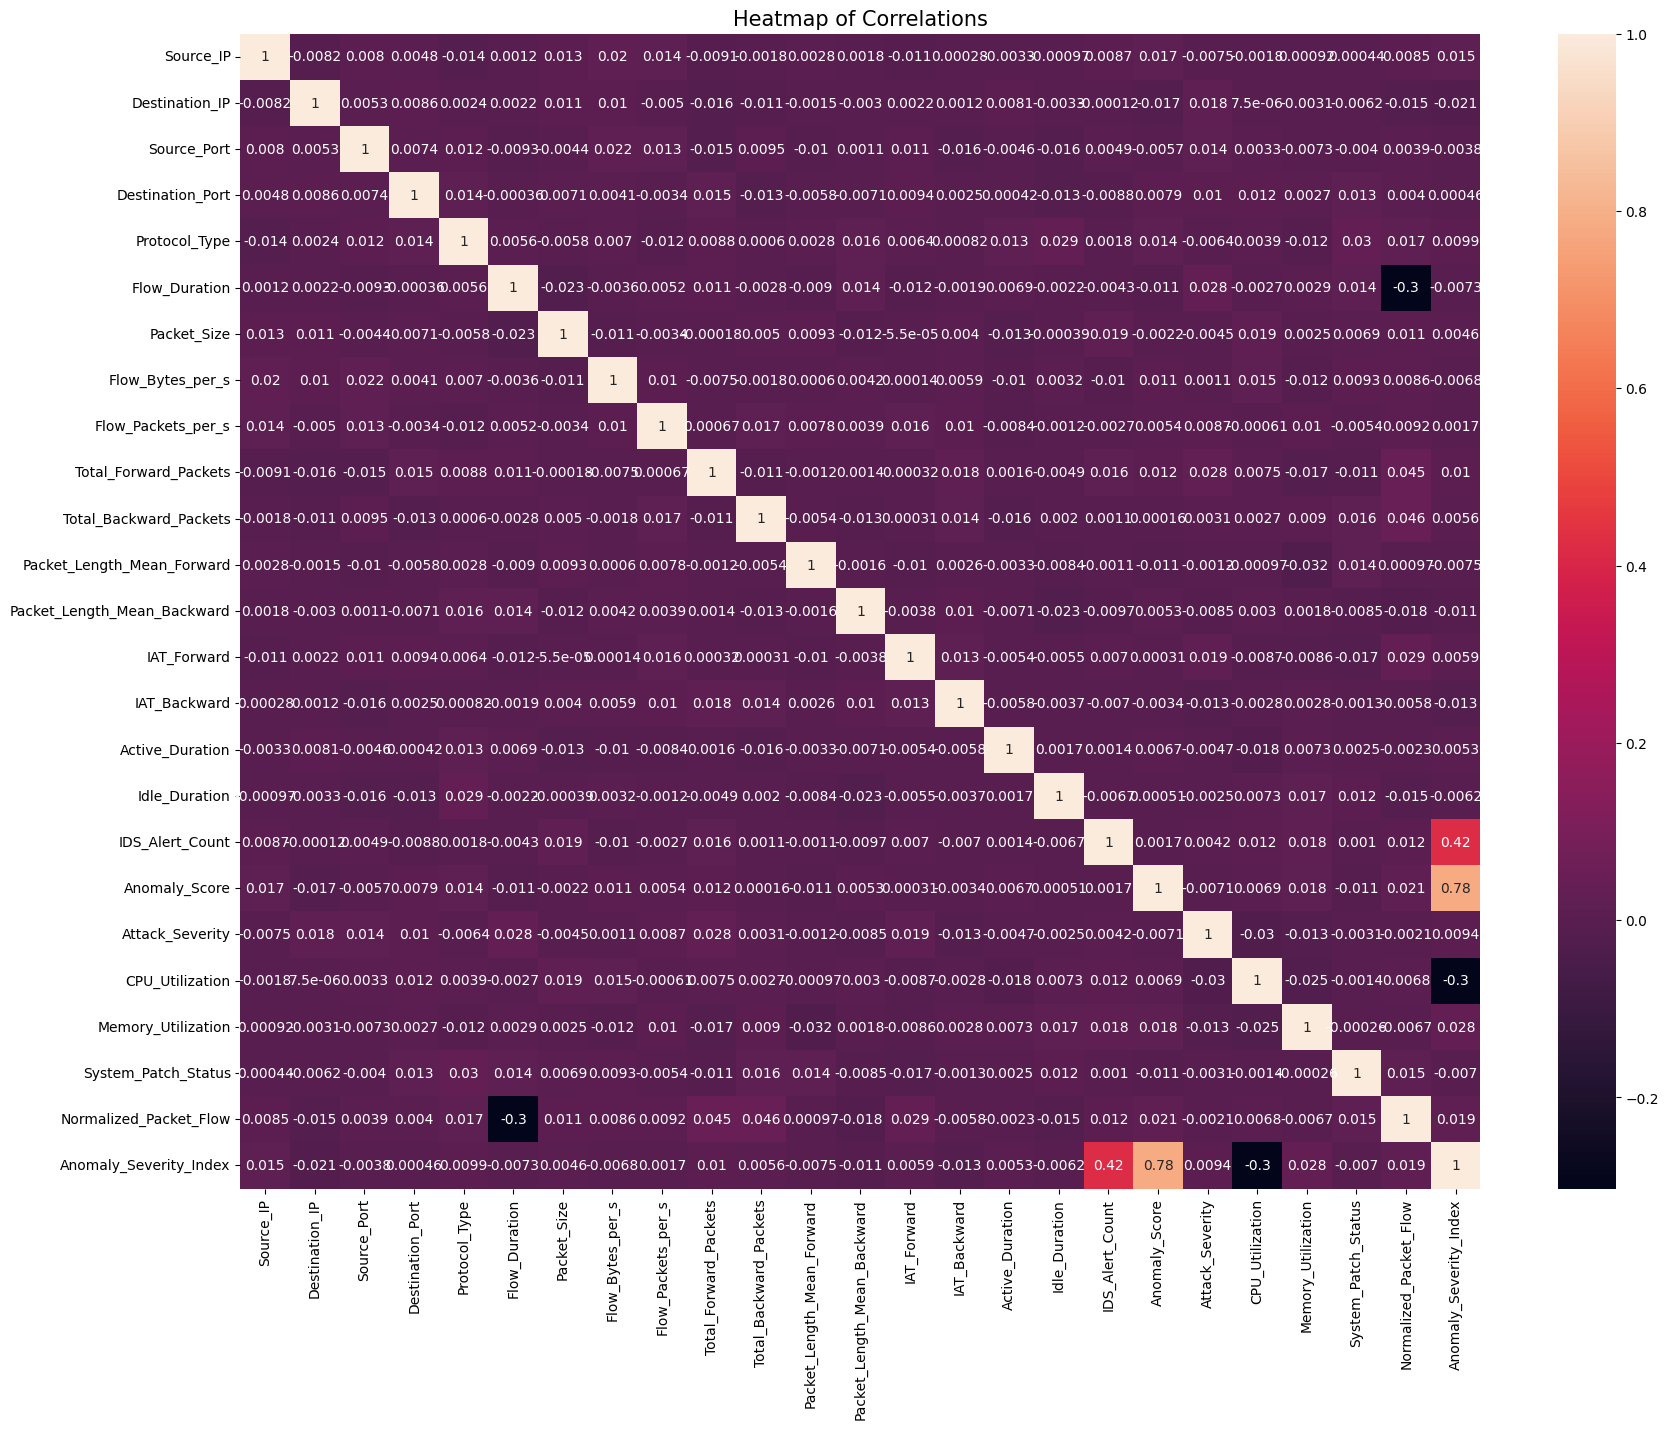

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

In [32]:
print(df.columns.tolist())

['Source_IP', 'Destination_IP', 'Source_Port', 'Destination_Port', 'Protocol_Type', 'Flow_Duration', 'Packet_Size', 'Flow_Bytes_per_s', 'Flow_Packets_per_s', 'Total_Forward_Packets', 'Total_Backward_Packets', 'Packet_Length_Mean_Forward', 'Packet_Length_Mean_Backward', 'IAT_Forward', 'IAT_Backward', 'Active_Duration', 'Idle_Duration', 'IDS_Alert_Count', 'Anomaly_Score', 'Attack_Severity', 'CPU_Utilization', 'Memory_Utilization', 'System_Patch_Status', 'Normalized_Packet_Flow', 'Anomaly_Severity_Index']


In [33]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]

In [34]:
x = df.drop(columns=['Attack_Severity'])
y = df['Attack_Severity']

In [35]:

# Import the necessary class
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality (optional but helps with large datasets)
pca = PCA(n_components=10)  # Reduce to 20 components (adjust as needed)
x_scaled_reduced = pca.fit_transform(x_scaled)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled_reduced,y,test_size=0.25,random_state=100)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

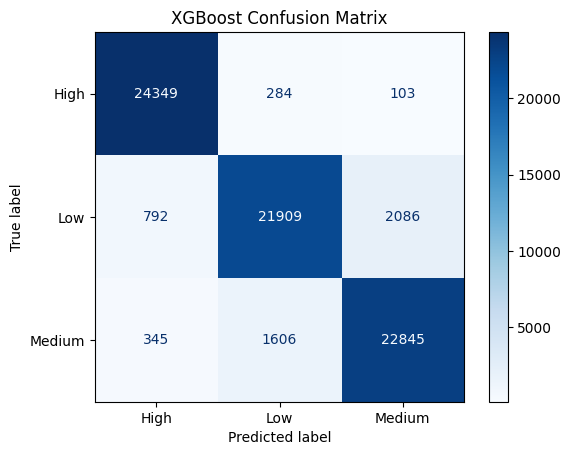

XGBoost Model Accuracy: 0.93


In [39]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create an XGBoost Classifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model using the selected features
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names (replace with your actual class names if needed)
# The global variables show that y_test has 6 unique values, which correspond to 6 classes.
class_names = ['High', 'Low', 'Medium']

# Display confusion matrix with correct display_labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names) # Updated this line
cm_display.plot(cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = xgb_model.score(x_test, y_test)
print(f"XGBoost Model Accuracy: {accuracy:.2f}")

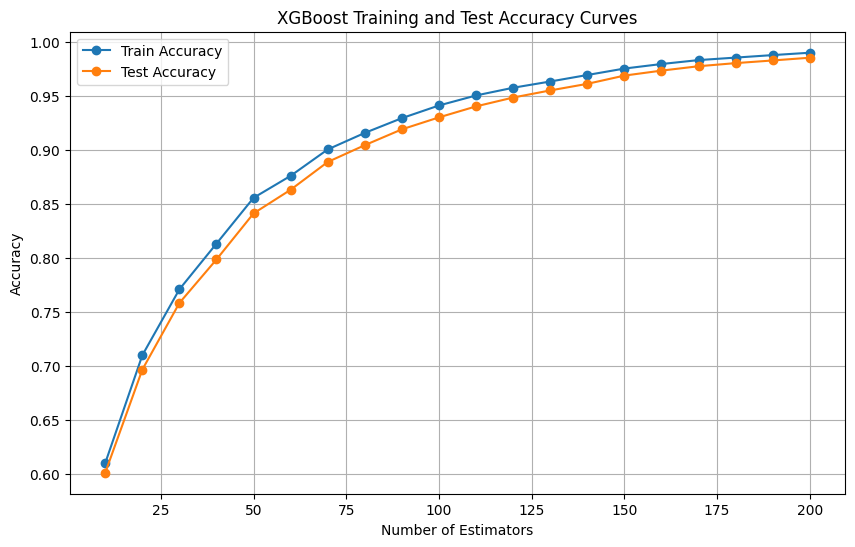

In [40]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Range of estimators to evaluate
estimators_range = range(10, 201, 10)  # Adjust the step or range as needed

for n_estimators in estimators_range:
    # Create an XGBoost Classifier model with varying n_estimators
    xgb_model = XGBClassifier(n_estimators=n_estimators, use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Train the model
    xgb_model.fit(x_train, y_train)

    # Predict on training and testing sets
    train_pred = xgb_model.predict(x_train)
    test_pred = xgb_model.predict(x_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the training and test accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(estimators_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Training and Test Accuracy Curves')
plt.legend()
plt.grid()
plt.show()

Accuracy on Train data is 0.36688733998941486
Accuracy on Test data is 0.3649134137972793
---------------------------


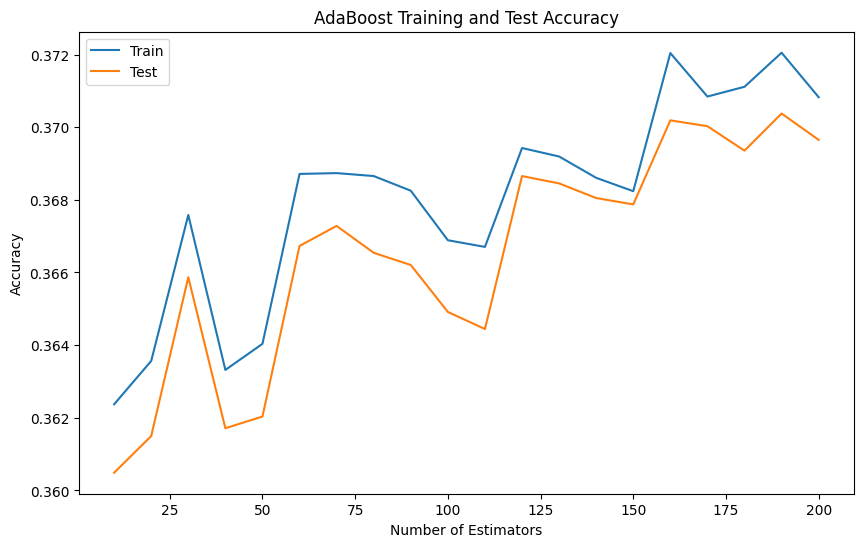

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100)

# Training the AdaBoost Classifier
clf.fit(x_train, y_train)

# Predictions on train and test sets
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Accuracy on Train data is " + str(train_accuracy))
print("Accuracy on Test data is " + str(test_accuracy))
print("---------------------------")

# Training and test accuracy curves
train_accuracies = []
test_accuracies = []
estimators_range = range(10, 201, 10)  # Adjust range if necessary

for n_estimators in estimators_range:
    # Update the number of estimators
    clf = AdaBoostClassifier(n_estimators=n_estimators)
    clf.fit(x_train, y_train)

    # Predictions
    train_pred = clf.predict(x_train)
    test_pred = clf.predict(x_test)

    # Accuracy scores
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the training and test accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Train')
plt.plot(estimators_range, test_accuracies, label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Training and Test Accuracy')
plt.legend()
plt.show()